In [1]:
import pandas as pd  #importing pandas library for reading the data
import seaborn as sns #importing seaborn library to visualize the data
import numpy as np #importing numpy library for math operations
#reading and assigning the dataset to a variable
mp_data = pd.read_csv("C:/Users/Mehmet/Desktop/Dersler 2020 Bahar/MobilePhones.csv") 

In [2]:
mp_data[:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


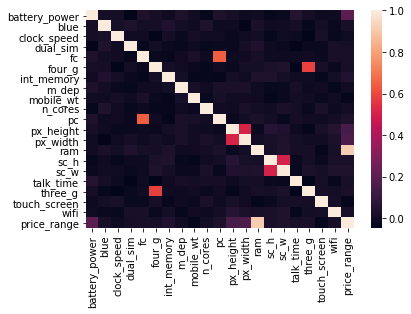

In [3]:
 #plotting the heatmap of variable correlations
features= mp_data.columns
sns.heatmap(mp_data[features].corr())

So the only meaningful correlations are between price_range and a few other variables. I read the source of the dataset and it was collected with the purpose of estimating mobile phone prices for a hypothetical company that makes phones. So my aim will be predicting the price range. And I'll be doing classification since price is seperated into 4 discreet categories.

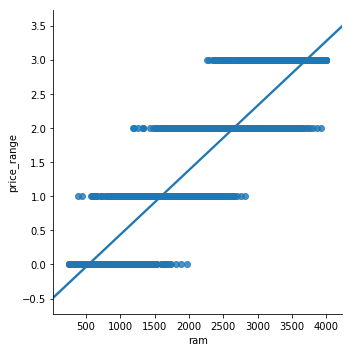

In [4]:
sns.lmplot(x='ram', y='price_range', data=mp_data) #plotting the price range with regard to amount of ram a phone has
#the mean ram increases significantly with each price range 
#which is to say there is a positive relation between ram and price_range 
#It seems to be that ram is a good factor when deciding mobile phone prices  

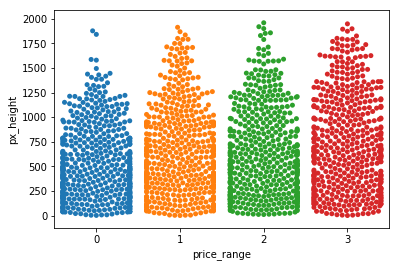

In [5]:
sns.swarmplot(y='px_height', x='price_range', data=mp_data)

While there is a lot of variance, high price ranges have more phones with high resoloution screens. So screen quality is also a good factor.

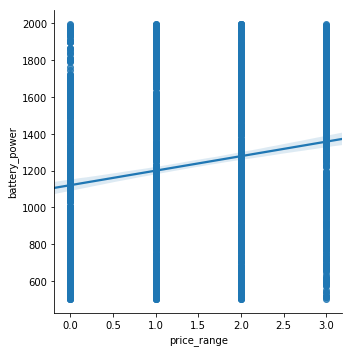

In [6]:
sns.lmplot(y='battery_power', x='price_range', data=mp_data)

With some variance, the average battery power increases with the price range. So battery capacity has influence on prices

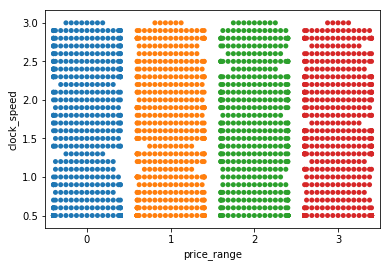

In [7]:
sns.swarmplot(y='clock_speed', x='price_range', data=mp_data)

There isn't a visible relation here which is is a surprise for me, because I expect cpu capacity to effect a mobile phones price. The dataset must either be skewed or include a lot older devices.   

In [8]:
X = mp_data[features[:-1]]
y = mp_data['price_range']

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [10]:
#reducing the columns to 5 best attributes
best_features = SelectKBest(chi2, k=5)
best_features.fit(X, y)

transformedX = best_features.transform(X)
print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")

Old Shape: (2000, 20) New shape: (2000, 5)


In [14]:
#I splitted the dataset and as I increased the number I got better results until 14 splits where the result peaked 
from sklearn.model_selection import KFold
cv = KFold(n_splits=14, shuffle=True, random_state=42) 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [15]:
accuracies = []
for train, test in cv.split(transformedX):
  model = DecisionTreeClassifier()
  model.fit(transformedX[train], y[train])

  scr = model.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.8524855426263876


In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(1,20), 
              'min_samples_split': range(2,5), 
              'min_samples_leaf': range(2, 5)}

gcv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10).fit(transformedX, y)

In [17]:
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Best Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best Parameter: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best Score: 0.872


Using DecisionTreeClassifier, I got my best result after hyper-parameter tuning with diferent ranges, 0.872 with 'max_depth' at 15, 'min_samples_leaf' at 2 and 'min_samples_split' at 3. I consider this a successful attempt at predicting the price range of a mobile phone.